# Step 0: Imports and Reading Data

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from IPython.display import display

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (14, 6)

path = "../data/"

checkout_1 = pd.read_csv(path + "checkout_1.csv")
checkout_2 = pd.read_csv(path + "checkout_2.csv")
transactions_1 = pd.read_csv(path + "transactions_1.csv")
transactions_2 = pd.read_csv(path + "transactions_2.csv")

pd.set_option('display.max_rows', 30)  # adjust if necessary

print("checkout_1:")
display(checkout_1)

print("checkout_2:")
display(checkout_2)

print("transactions_1:")
display(transactions_1)

print("transactions_2:")
display(transactions_2)

checkout_1:


,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
0,00h,9,12,11,6.42,4.85
1,01h,3,5,1,1.85,1.92
2,02h,1,0,0,0.28,0.82
3,03h,1,0,0,0.42,0.46
4,04h,0,0,1,0.42,0.21
5,05h,1,1,2,1.28,0.75
6,06h,1,1,5,2.85,2.28
7,07h,2,3,9,5.57,5.21
8,08h,0,1,18,8.71,10.42
9,09h,2,9,30,20.00,19.07


checkout_2:


,time,today,yesterday,same_day_last_week,avg_last_week,avg_last_month
0,00h,6,9,5,5.000,4.92
1,01h,3,3,2,2.000,1.92
2,02h,3,1,2,0.420,0.75
3,03h,0,1,1,0.420,0.46
4,04h,0,0,0,0.140,0.21
5,05h,2,1,1,0.710,0.71
6,06h,3,1,2,1.420,2.10
7,07h,10,2,9,3.000,5.03
8,08h,25,0,12,3.710,9.82
9,09h,36,2,27,10.140,17.64


transactions_1:


,time,status,f0_
0,00h 00,approved,9
1,00h 00,denied,6
2,00h 00,refunded,1
3,00h 01,denied,8
4,00h 01,approved,13
...,...,...,...
4229,23h 59,processing,4
4230,23h 59,denied,1
4231,23h 59,backend_reversed,5
4232,23h 59,approved,10


transactions_2:


,time,status,count
0,00h 00,reversed,7
1,00h 00,approved,9
2,00h 00,processing,12
3,00h 00,denied,3
4,00h 00,backend_reversed,2
...,...,...,...
3939,23h 57,denied,11
3940,23h 58,denied,4
3941,23h 58,approved,35
3942,23h 59,denied,10


# Step 1 : Data understanding
## Graphical visualisation and SQL query

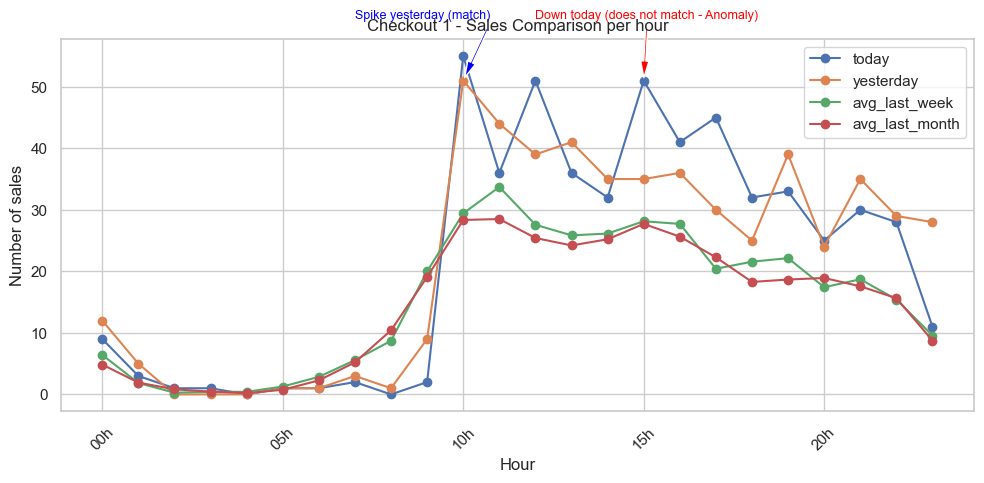

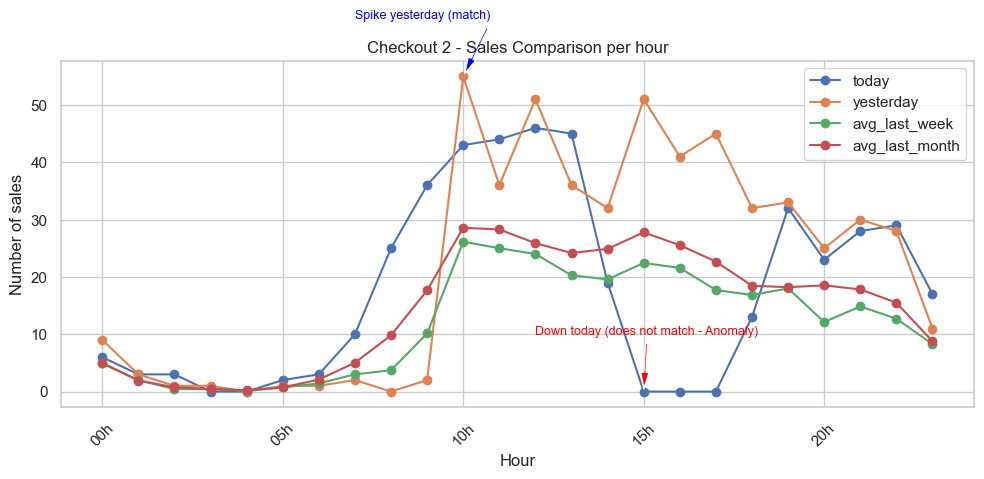

In [23]:
checkout_1 = pd.read_csv("../data/checkout_1.csv")
checkout_2 = pd.read_csv("../data/checkout_2.csv")

def plot_checkout(df, title):
    fig, ax = plt.subplots(figsize=(10, 5))

    # Desenha as linhas
    df.plot(
        x='time',
        y=['today', 'yesterday', 'avg_last_week', 'avg_last_month'],
        kind='line',
        marker='o',
        ax=ax,
        title=title
    )

    ax.set_xlabel("Hour")
    ax.set_ylabel("Number of sales")
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

    # Anotação para queda abrupta às 15h (today == 0)
    if '15h' in df['time'].values:
        idx_15 = df[df['time'] == '15h'].index[0]
        y15 = df.loc[idx_15, 'today']
        ax.annotate(
            'Down today (does not match - Anomaly)',
            xy=(idx_15, y15),
            xytext=(idx_15 - 3, y15 + 10),
            textcoords='data',
            fontsize=9,
            color='red',
            arrowprops=dict(facecolor='red', shrink=0.05, width=1.5, headwidth=6)
        )

    # Anotação para spike às 10h (yesterday)
    if '10h' in df['time'].values:
        idx_10 = df[df['time'] == '10h'].index[0]
        y10 = df.loc[idx_10, 'yesterday']
        ax.annotate(
            'Spike yesterday (match)',
            xy=(idx_10, y10),
            xytext=(idx_10 - 3, y10 + 10),
            textcoords='data',
            fontsize=9,
            color='blue',
            arrowprops=dict(facecolor='blue', shrink=0.05, width=1.5, headwidth=6)
        )

    plt.tight_layout()
    plt.show()

# Exemplo de uso para checkout_1 e checkout_2
plot_checkout(checkout_1, "Checkout 1 - Sales Comparison per hour")
plot_checkout(checkout_2, "Checkout 2 - Sales Comparison per hour")

In [26]:
from pandasql import sqldf

pysqldf = lambda q: sqldf(q, globals())

# Join
checkout_1['checkout_id'] = 1
checkout_2['checkout_id'] = 2

checkout_data = pd.concat([checkout_1, checkout_2], ignore_index=True)

query = """
SELECT
    time,
    MAX(CASE WHEN checkout_id = 1 THEN today ELSE NULL END) AS checkout_1_today,
    MAX(CASE WHEN checkout_id = 2 THEN today ELSE NULL END) AS checkout_2_today
FROM checkout_data
WHERE time IN ('10h', '15h')
GROUP BY time
ORDER BY CASE 
    WHEN time = '10h' THEN 1
    WHEN time = '15h' THEN 2
    ELSE 3
END;
"""

anomaly = pysqldf(query)
display(anomaly)

,time,checkout_1_today,checkout_2_today
0,10h,55,43
1,15h,51,0


## Step 2 : Identification of Anomalous Behaviors

Based on the visual analysis and the SQL query performed, two relevant anomalies were detected in the hourly sales data:

---

### 🔻 Anomaly 1: Sales Drop at Checkout 2 from 3 PM Onwards

**Observation:**  
For `checkout_2`, there is a significant drop in **"today"** sales starting from **3 PM**. The sales volume at `checkout_2` at 3 PM is **0**, which represents a sharp decline compared to:

- 51 sales **yesterday**
- 42 sales **same day last week**
- **Last week's average**: 22.43  
- **Last month's average**: 27.78

This drop to nearly zero persists in the following hours, indicating a possible **operational failure** or **interruption** in the `checkout_2` system during this period.

**Comparison:**  
At the same time, `checkout_1` registered **51 sales**, also surpassing its historical values:

- 35 sales **yesterday**
- **Last week's average**: 28.14  
- **Last month's average**: 27.71

This reinforces that the drop was **specific to checkout_2**, ruling out external causes or general low demand.

---

### 🔺 Anomaly 2: Sales Spike at 10 AM Across Both Checkouts

**Observation:**  
Both checkout systems showed a **significant spike in sales at 10 AM**, exceeding historical references:

#### ✅ Checkout 1:
- **Today:** 55 sales  
- **Yesterday:** 51 sales  
- **Same day last week:** 45 sales  
- **Last week's average:** 29.42  
- **Last month's average:** 28.35  

#### ✅ Checkout 2:
- **Today:** 43 sales  
- **Yesterday:** 55 sales  
- **Same day last week:** 42 sales  
- **Last week's average:** 26.14  
- **Last month's average:** 28.57  

Although slightly below yesterday's figure for `checkout_2`, the current volume still represents a **significant increase compared to the averages**, suggesting a possible **promotional event** or **change in consumer behavior** at this time.

---

### Conclusion

These anomalies were detected based on visual analysis (graphs) and validated via SQL, allowing for a clear explanation of out-of-pattern behaviors in the context of hourly sales.